# **Milestone 2**

## `i. Perkenalan`

**Nama   : Andika Atmanegara Putra**

**Batch  : FTDS - RMT - 019**

`Dataset` : Data diambil dari ***kaggle*** yang dapat
            diakses pada link berikut https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/code

`Problem Statement` : Dengan menggunakan dataset yang diambil dari kaggle, lakukan pemodelan untuk memprediksi apakah seseorang dengan kategori-kategori tertentu berpotensi mengidap diabetes atau tidak.

`Objective` : Mempersiapkan dataset dengan preprocessing, melakukan explorasi dataset, menganalisa dan mengimplementasikan empat algoritma untuk memprediksi target, dan melakukan Hyperparameter Tuning pada model yang dibuat.

## `ii. Import Libraries`

In [1]:
# Import library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer #Outlier / Missing Value
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer # Caping Missing Value

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from scipy.stats import chi2_contingency

# Model

# Liniear regression & Logistic Regression
from sklearn.linear_model import LogisticRegression, LinearRegression

# Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Adaboost
from sklearn.ensemble import AdaBoostClassifier

# GridsearchCV & Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

# Evaluasi
# Classification
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, recall_score

# Save Model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

## `iii. Data Loading`

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
# tampilkan 10 data pertama
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
data.tail(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# cek duplikasi data
data[data.duplicated(keep=False)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


Untuk data duplikasi yang tidak akan di handling karena dianggap data diatas adalah unik untuk setiap pasien.

In [7]:
# ubah tipe data kolom age dan blood_glocose_level
data['age'] = data['age'].astype(int)
data['blood_glucose_level'] = data['blood_glucose_level'].astype(float)

In [8]:
# Rename kolom HbA1c_Level
data = data.rename({'HbA1c_level' : 'hemoglobin_level'}, axis=1)

In [9]:
# cek kembali dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   hemoglobin_level     100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 6.5+ MB


In [10]:
# backup dataset 
raw = data.copy()

## `iv. Exploratory Data Analysis (EDA)`

In [11]:
# melihat data unique masing-masing kolom
data.nunique()

gender                    3
age                      81
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
hemoglobin_level         18
blood_glucose_level      18
diabetes                  2
dtype: int64

cek data unique kolom gender, smoking_history, hemoglobin_level, blood_glucose_level

In [12]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

ternyata ada 3 gender berupa female, male, dan other. `lakukan encoding`

In [13]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

ada 18 pasien yang tidak teridentifikasi jenis kelaminnya.

In [14]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

`lakukan penggabungan kategori` pada kolom smoking_history

In [15]:
data['blood_glucose_level'].unique()

array([140.,  80., 158., 155.,  85., 200., 145., 100., 130., 160., 126.,
       159.,  90., 260., 220., 300., 280., 240.])

### Visualisasi

* Visualisasi Jumlah Penderita Diabetes

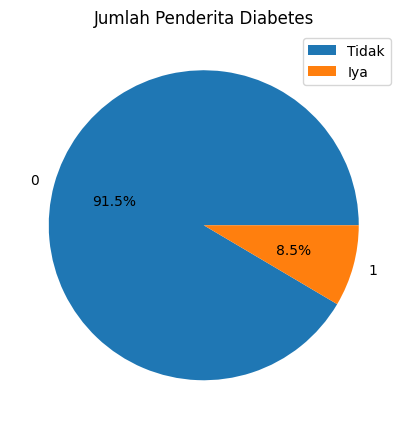

In [16]:
# simpan nilai pada variabel
diabetes_count = data['diabetes'].value_counts()

# buat plot
plt.figure(figsize=(5,6))
plt.pie(diabetes_count.values, labels=diabetes_count.index, autopct='%1.1f%%')
plt.title('Jumlah Penderita Diabetes')
plt.legend(['Tidak', 'Iya'])
plt.show()

Dari grafik diatas terlihat, jumlah penderita diabetes hanya sebesar 8,5% dari total keseluruhan data. Sehingga ada ketidakseimbangan data diabetes pada dataset.

* Visualisasi umur yang terkena diabetes

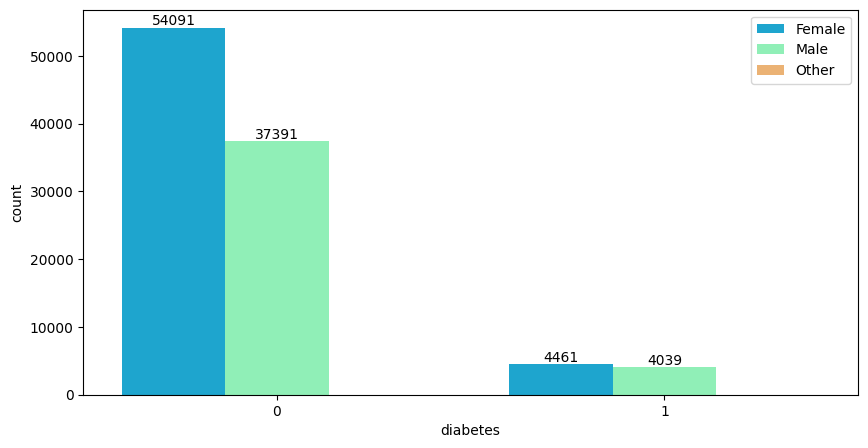

In [17]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='diabetes',data=data,palette='rainbow',hue='gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(loc='upper right')

Data diatas menunjukkan bahwa pasien yang menderita diabetes cenderung lebih banyak berjenis kelamin wanita dengan selisih dengan pasien pria +- 400 pasien. Untuk kategori pasien di dataset yang tidak menderita diabetes juga didominasi oleh pasien wanita sebesar 54.091 pasien dan 37.391 pasien pria.

[Text(0, 0, '38142'), Text(0, 0, '3288')]

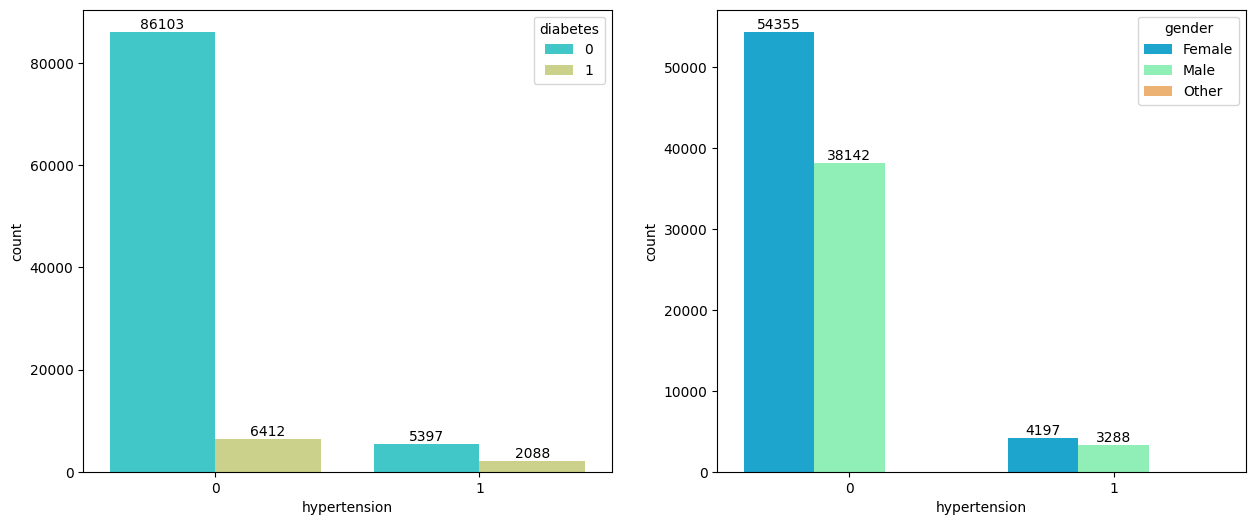

In [18]:
plt.figure(figsize=(15,6))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.countplot(x='hypertension',data=data,palette='rainbow',hue='diabetes',ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
sns.countplot(x='hypertension',data=data,palette='rainbow',hue='gender',ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])

Dari grafik diatas, pada gambar kiri menunjukkan bahwa pasien yang tidak menderita diabetes masih bisa mengidap hipertensi begitu pun untuk pasien yang menderita diabetes juga hanya sebagian saja yang menderita hipertensi. Dari grafik tersebut juga diketahui mayoritas yang terkena hipertensi pada dataset adalah pasien wanita.

[Text(0, 0, '39050'), Text(0, 0, '2380')]

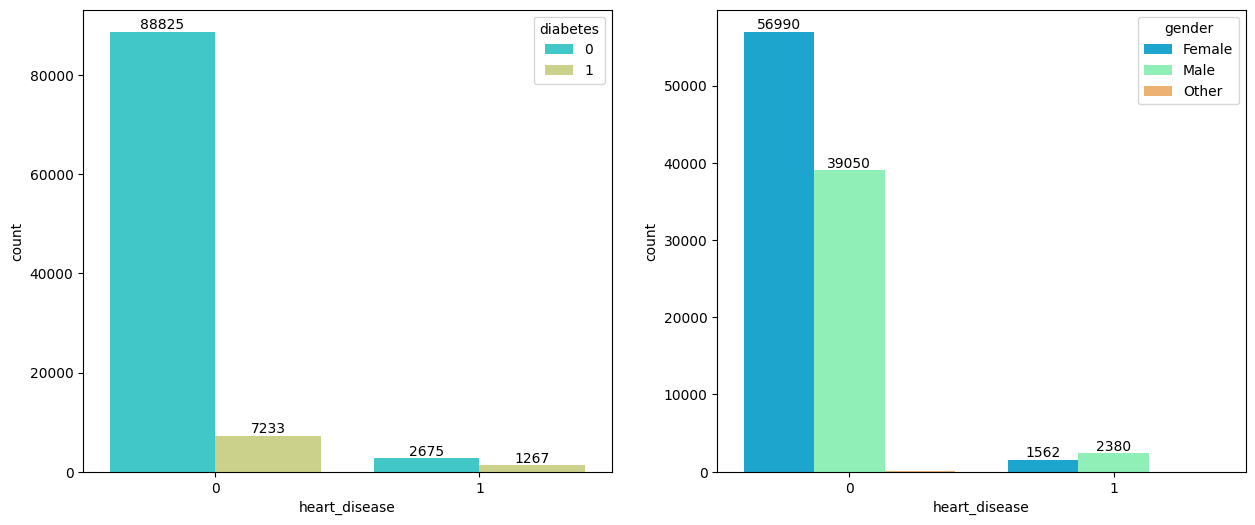

In [19]:
plt.figure(figsize=(15,6))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.countplot(x='heart_disease',data=data,palette='rainbow',hue='diabetes',ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
sns.countplot(x='heart_disease',data=data,palette='rainbow',hue='gender',ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])

Hal yang dijelaskan diatas pada hipertensi berlaku juga untuk penyakit jantung yang mana untuk pasien penderita diabetes hanya sebagian kecil yang menderita penyakit jantung. Dari pasien yang menderita penyakit jantung sebagian besar diderita pasien wanita.

[Text(0, 0, '12223'),
 Text(0, 0, '16110'),
 Text(0, 0, '4228'),
 Text(0, 0, '4578'),
 Text(0, 0, '1765'),
 Text(0, 0, '2526')]

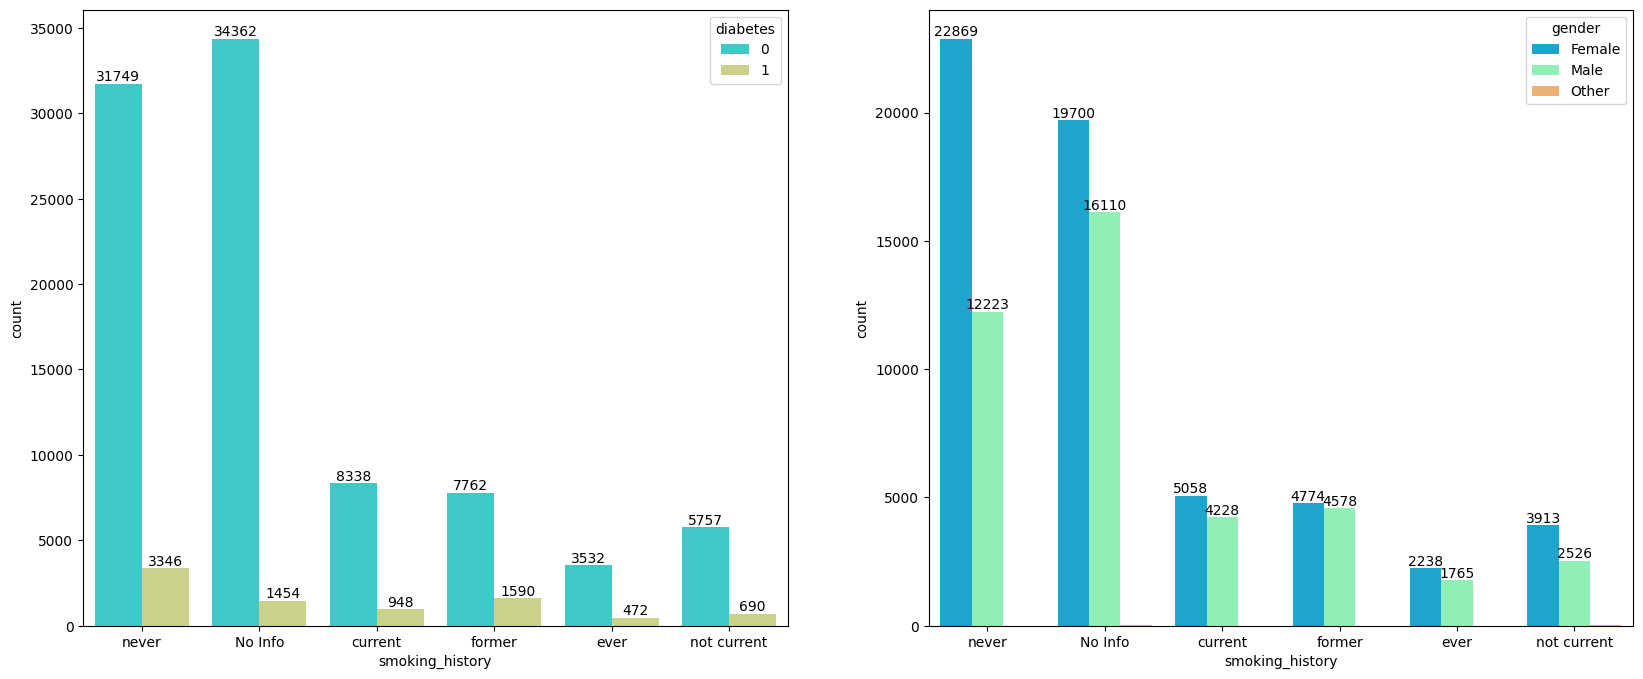

In [20]:
plt.figure(figsize=(20,8))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.countplot(x='smoking_history',data=data,palette='rainbow',hue='diabetes',ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
sns.countplot(x='smoking_history',data=data,palette='rainbow',hue='gender',ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])

Grafik diatas menunjukkan histori dari rokok pada pasien, apakah pasien tersebut pernah merokok atau tidak atau masih sampai sekarang merokok. Berdasarkan analisa awal, informasi tentang rokok tidak relevant dengan prediksi apakah pasien bisa menderita diabetes atau tidak karena banyaknya kategori "No_info" di dataset. 

<Axes: xlabel='blood_glucose_level', ylabel='Density'>

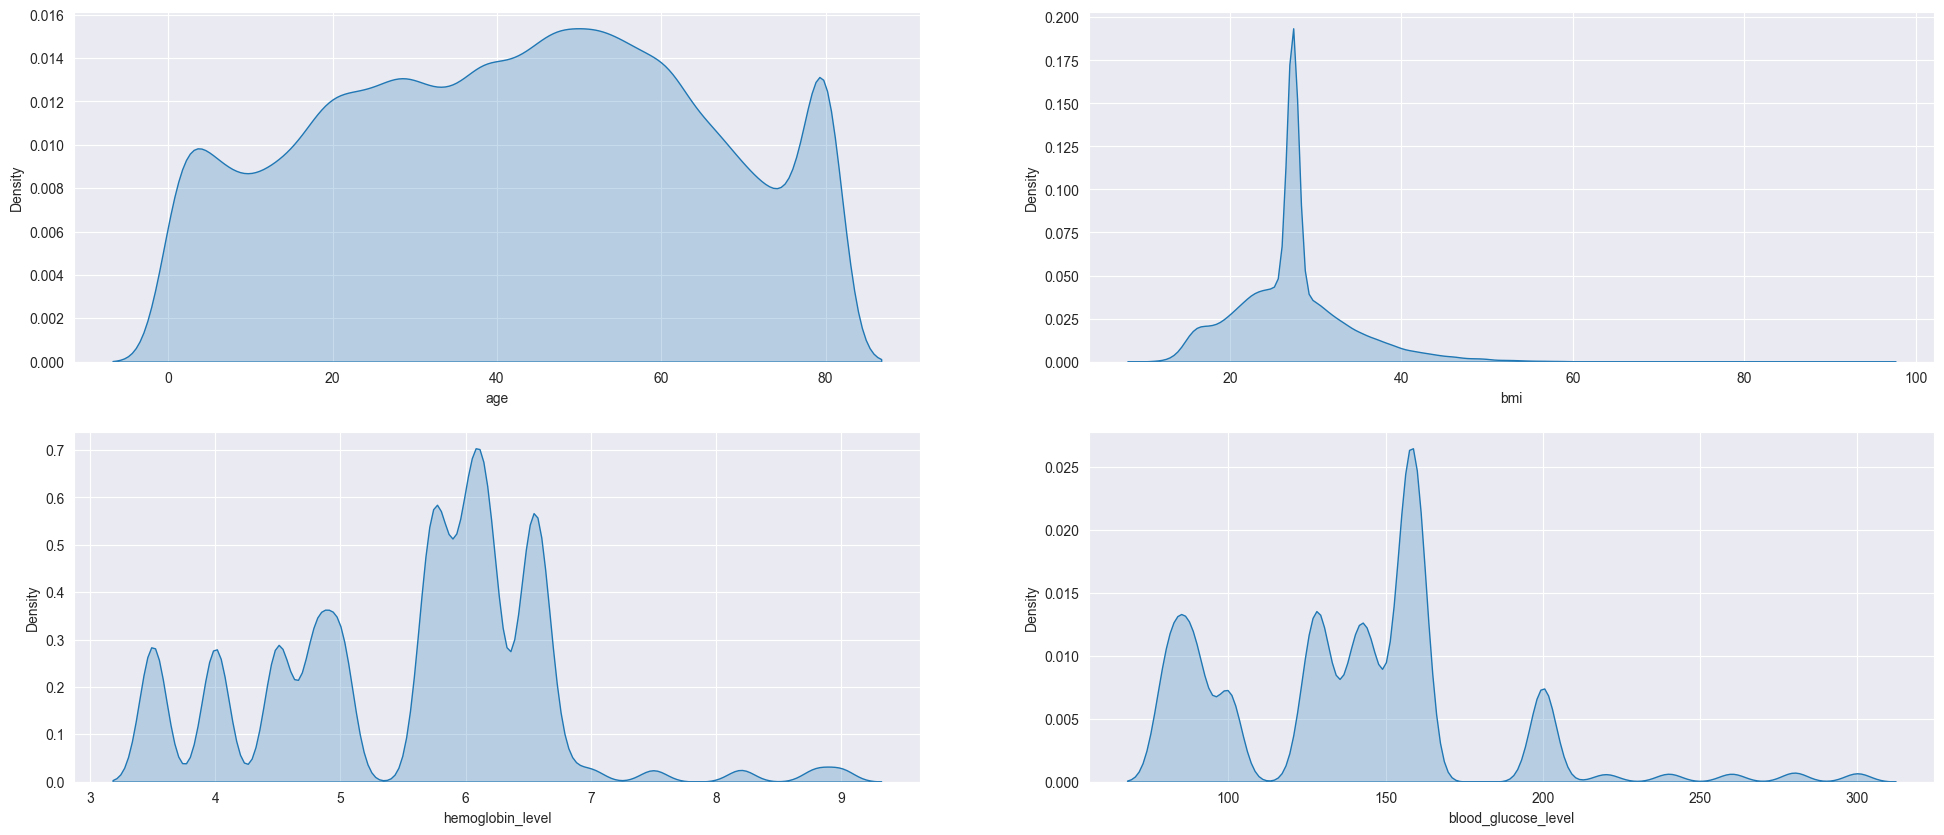

In [21]:
plt.figure(figsize=(24,10))
sns.set_style('darkgrid')
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((2,2),(0,0))
ax[1]=plt.subplot2grid((2,2),(0,1))
ax[2]=plt.subplot2grid((2,2),(1,0))
ax[3]=plt.subplot2grid((2,2),(1,1))
sns.kdeplot(x='age',data=data,fill=True,ax=ax[0])
sns.kdeplot(x='bmi',data=data,fill=True,ax=ax[1])
sns.kdeplot(x='hemoglobin_level',data=data,fill=True,ax=ax[2])
sns.kdeplot(x='blood_glucose_level',data=data,fill=True,ax=ax[3])

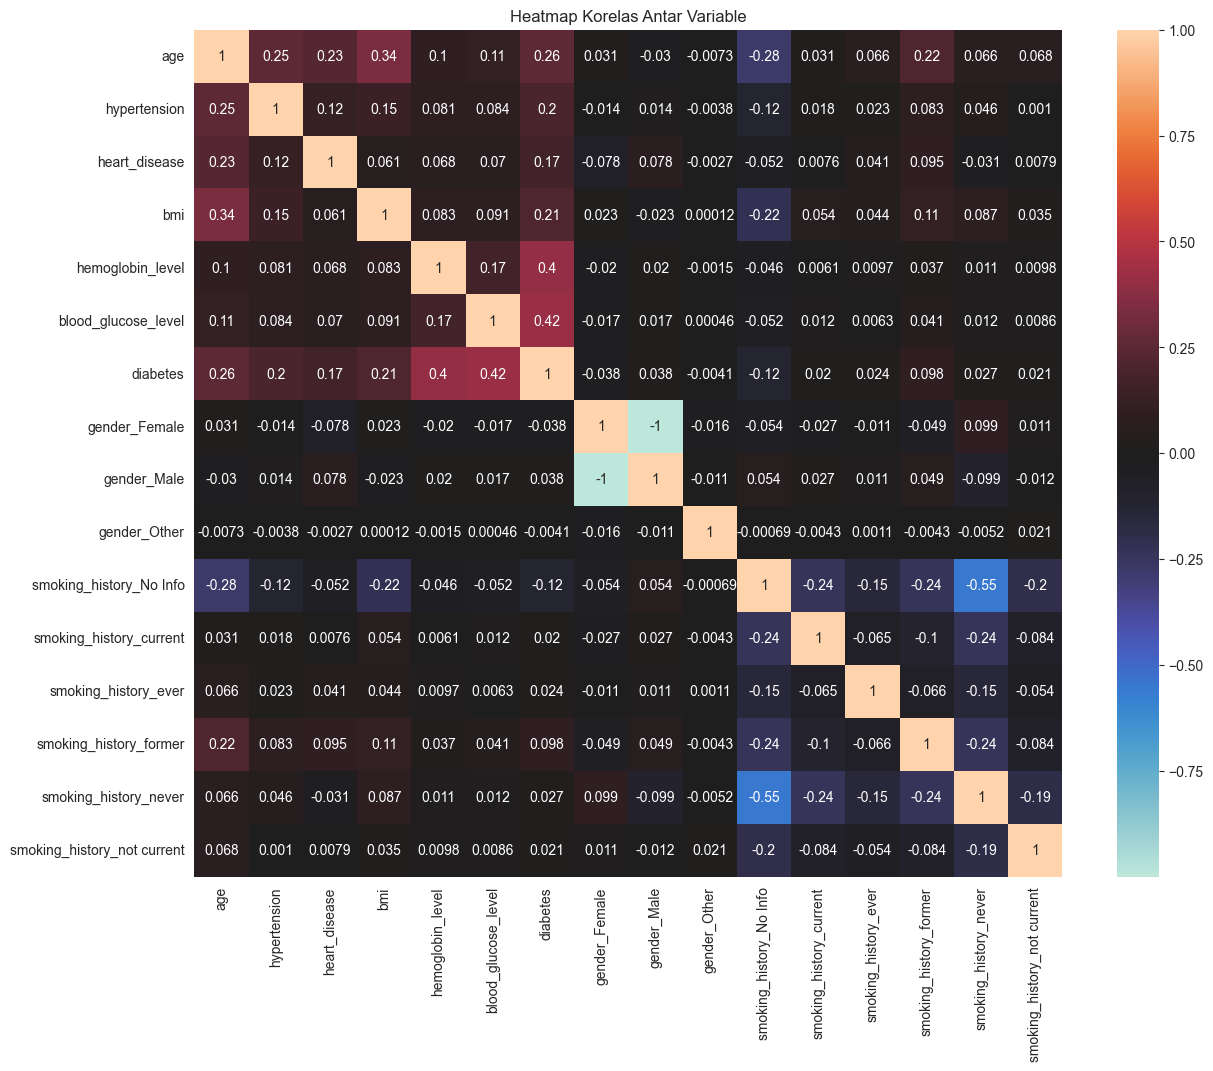

In [22]:
plt.figure(figsize=(14,11))
sns.heatmap(pd.get_dummies(data).corr(), annot = True, cmap = 'icefire')
plt.title('Heatmap Korelas Antar Variable')
plt.show()

Berdasarkan grafik heatmap terlihat sekilas bahwa terdapatnya korelasi antara pasien dapat terindikasi diabetes atau tidak dengan variabel yaitu: "bmi","hemoglobin_level","blood_glucose_level", dan lain-lainnya.

## `v. Feature Engineering`

### Drop Feature

In [23]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [24]:
# hapus feature smoking_history
data.drop(['smoking_history'], axis=1, inplace=True)

Alasan mengapa peneliti melakukan drop feature smoking_history dikarenakan jika dilihat dari jumlah data untuk kategori 'No Info' adalah sebesar 35.816 entries data atau +- 35% dari total data. Jika memang dokter atau tenaga kesehatan menggangap smoking_history sebagai faktor yang penting, seharusnya data untuk kategori 'No_info' tidak akan sebanyak itu.

 ### Sampling Data Inference

In [25]:
# ambil sample random
data_i = data.sample(30, random_state=22)

# pisahkan dari dataset utama
data = data.drop(data_i.index)

# reset index
data_i.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# check shape 
print('Ukuran data asli: ',raw.shape)
print('Ukuran data inference: ', data_i.shape)
print('Ukuran data asli - data inference: ', data.shape)

Ukuran data asli:  (100000, 9)
Ukuran data inference:  (30, 8)
Ukuran data asli - data inference:  (99970, 8)


### Missing Values

* cek missing dataset

In [26]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
hemoglobin_level       0
blood_glucose_level    0
diabetes               0
dtype: int64

In [27]:
data['gender'].value_counts()

gender
Female    58532
Male      41420
Other        18
Name: count, dtype: int64

In [28]:
data.replace('Other', np.nan, inplace = True)

In [29]:
data['gender'].value_counts()

gender
Female    58532
Male      41420
Name: count, dtype: int64

* Handling Missing Value

In [30]:
# drop data gender=others
data = data.dropna(subset=['gender'])

# cek kembali
print(data.isnull().sum()) 

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
hemoglobin_level       0
blood_glucose_level    0
diabetes               0
dtype: int64


Missing value pada kedua datat train dan test sudah dibersihkan.

### Split Feature (X) dan Target (y)

In [31]:
# split 
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

# cek kolom feature
X.shape

(99952, 7)

### Split Train dan Test Set

In [32]:
# Split data dalam Train dan Test Set
# Splitting data kepada data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 22,
                                                    stratify = y)
print('Feature Train Size :', X_train.shape)
print('Feature Test Size :', X_test.shape)
print('Target Train Size :', y_train.shape)
print('Target Test Size :', y_test.shape)

Feature Train Size : (79961, 7)
Feature Test Size : (19991, 7)
Target Train Size : (79961,)
Target Test Size : (19991,)


### Feature Encoding

In [33]:
# Mengubah nilai 'Male' menjadi 1 dan 'Female' menjadi 0 pada X_train
X_train['gender'] = X_train['gender'].map({'Male': 1, 'Female': 0})

# Menampilkan hasil perubahan
print(X_train)

       gender  age  hypertension  heart_disease    bmi  hemoglobin_level   
38764       1   40             0              0  28.75               6.2  \
32222       1   73             0              0  27.32               4.5   
23973       0    2             0              0  18.68               6.0   
2012        1    9             0              0  27.32               6.6   
66149       1   19             0              0  21.12               6.2   
...       ...  ...           ...            ...    ...               ...   
73108       0   49             0              0  23.58               3.5   
63822       0   69             0              0  22.76               5.8   
8059        1   19             0              0  27.32               5.8   
38425       0   28             0              0  27.32               4.0   
13183       0   11             0              0  16.94               5.0   

       blood_glucose_level  
38764                159.0  
32222                160.0  


In [34]:
# Mengubah nilai 'Male' menjadi 1 dan 'Female' menjadi 0 pada X_test
X_test['gender'] = X_test['gender'].map({'Male': 1, 'Female': 0})

# Menampilkan hasil perubahan
print(X_test.head())

       gender  age  hypertension  heart_disease    bmi  hemoglobin_level   
22997       0   48             1              0  21.22               5.7  \
52062       1   61             1              0  37.35               5.7   
58120       1   45             1              0  36.90               4.5   
71556       0   43             0              0  30.31               6.5   
32821       0    3             0              0  16.42               6.6   

       blood_glucose_level  
22997                200.0  
52062                 85.0  
58120                159.0  
71556                159.0  
32821                126.0  


### Outliers

Dikarenakan tidak adanya missing values di feature dan target, maka tidak perlu dilakukan handling

* Visualisasi Outliers

In [35]:
def plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()

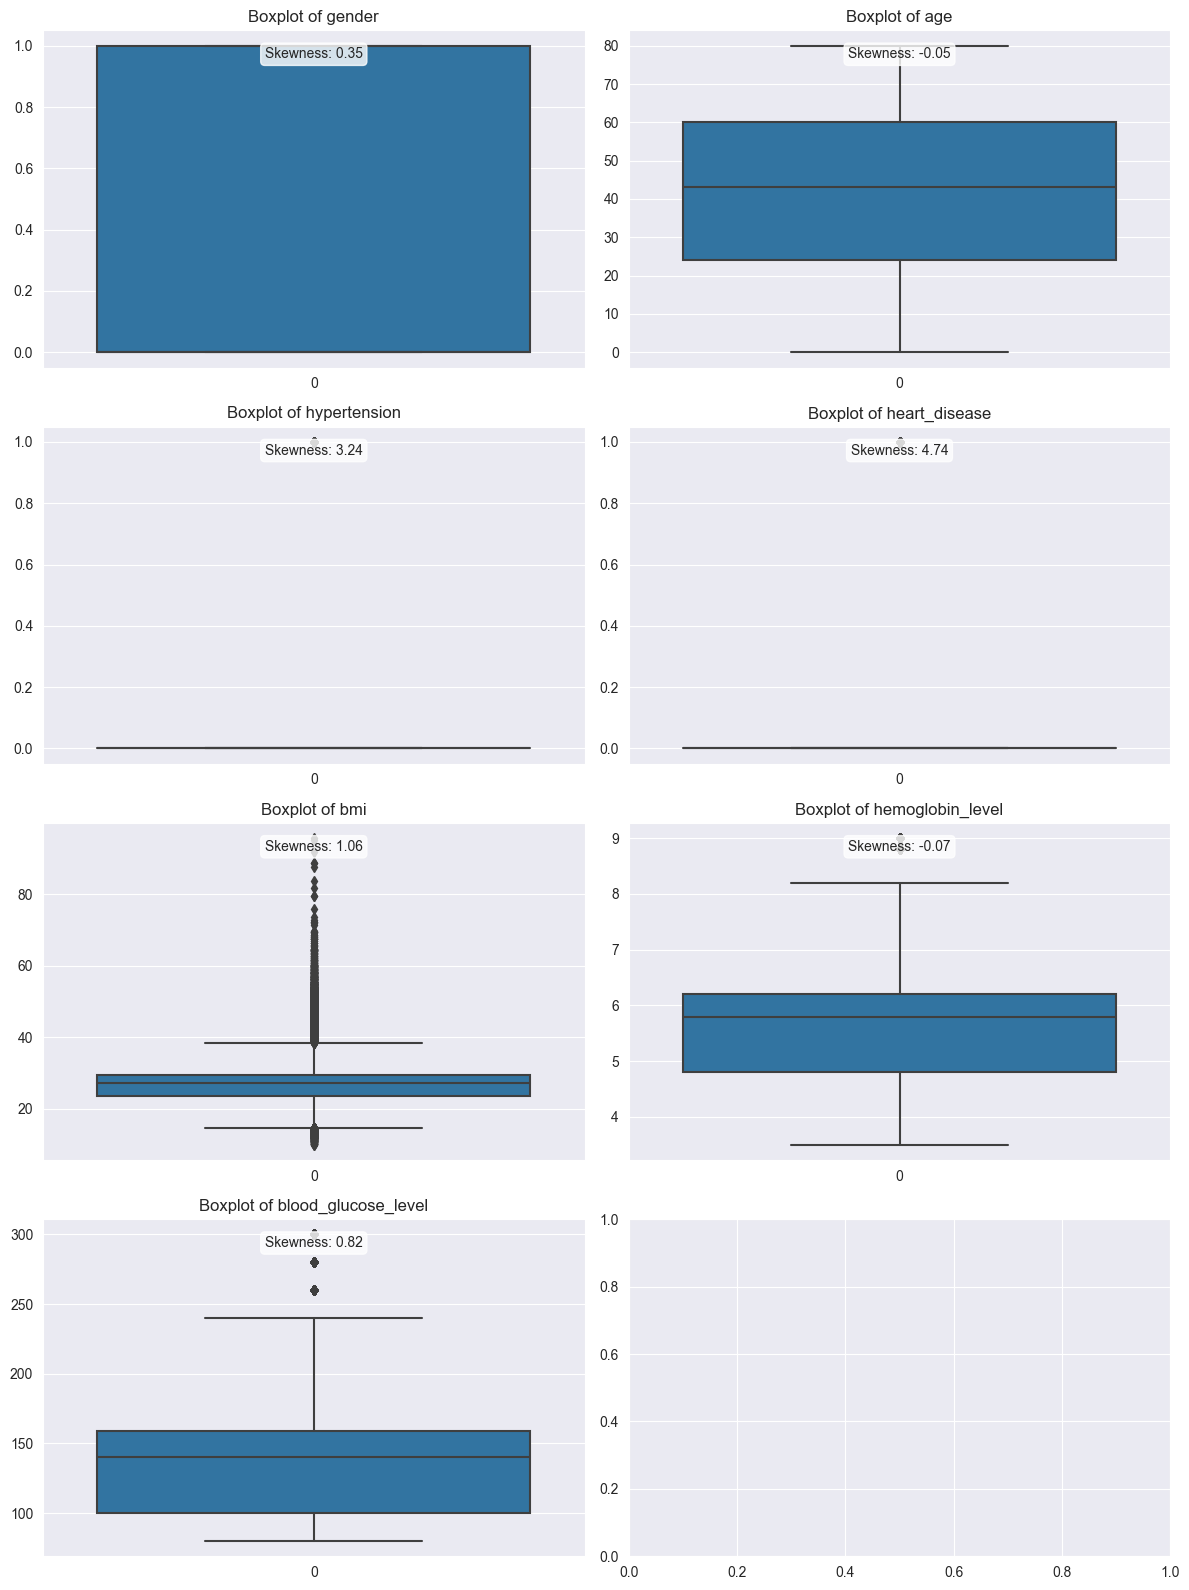

In [36]:
plots(X_train)

Dari grafik diatas, menunjukkan nilai outlier pada beberapa feature yang akan dihandling.

* Handling Outliers

Dikarenakan outlier pada dataset merupakan natural outlier, maka penanganan yang dilakukan adalah **Capping**

In [37]:
# Menggunakan winsorizer pada data train
windsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=(['blood_glucose_level','bmi']))

windsoriser.fit(X_train)
windsoriser.fit(X_test)

X_train_t = windsoriser.transform(X_train)
X_test_t = windsoriser.transform(X_test)


# Menampilkan nilai min-max 
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'blood_glucose_level': 11.5, 'bmi': 14.749999999999996}
Right Tail Caps :  {'blood_glucose_level': 247.5, 'bmi': 38.43000000000001}


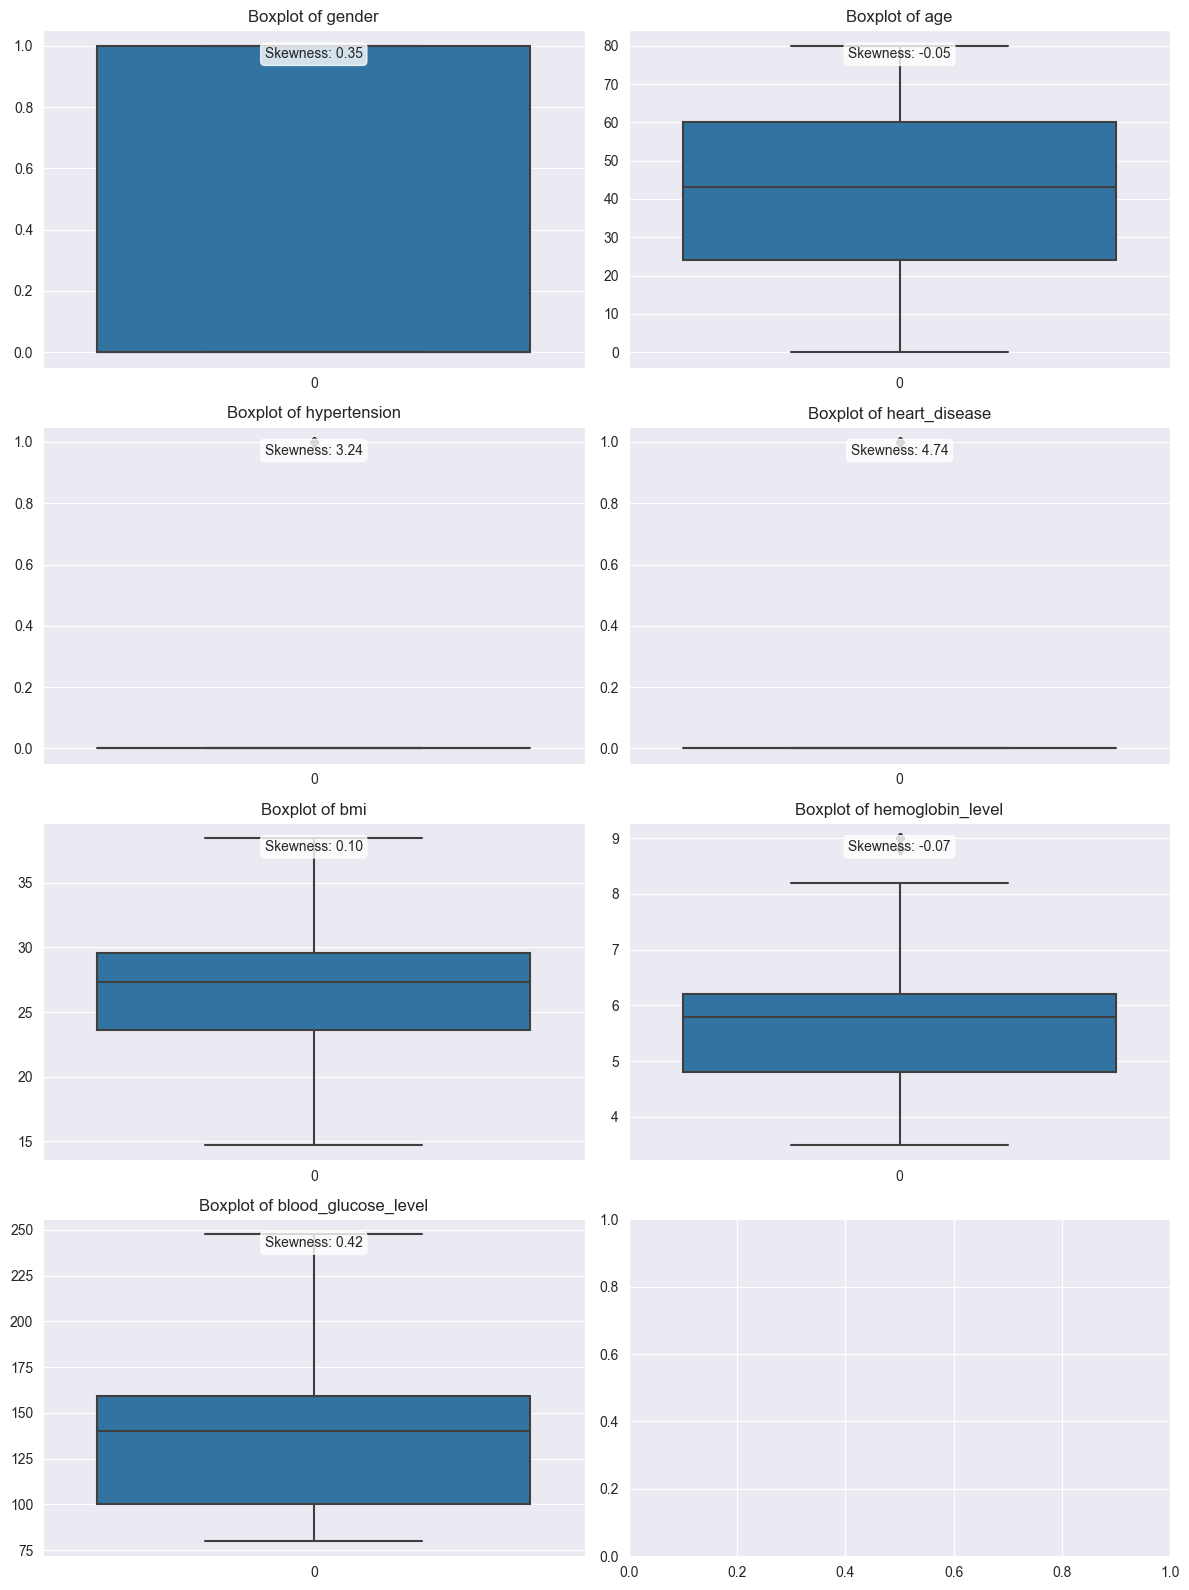

In [38]:
# cek kembali distribusi data train
plots(X_train_t)

Berdasarkan grafik diatas, nilai outliers sudah di handling dan tidak ada lagi pada data train.

### Feature Scaling

In [39]:
# bagi kolom numerical yang discalling dan yang tidak
num_cols_nsc = ['gender','hypertension','heart_disease']
num_cols_sc = X_train_t.drop(num_cols_nsc, axis=1).columns.tolist()

In [40]:
X_train_sc = X_train_t[num_cols_sc]
X_test_sc = X_test[num_cols_sc]

X_train_nsc = X_train_t[num_cols_nsc]
X_test_nsc = X_test[num_cols_nsc]

In [41]:
# panggil scaller
scaler = MinMaxScaler()

# fit X_train_sc
scaler.fit(X_train_sc)

# trabsform X_train dan X_test
X_train_num_scaled= scaler.transform(X_train_sc)
X_test_num_scaled= scaler.transform(X_test_sc)

# buat dalam bentuk dataFrame
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols_sc)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols_sc)

In [42]:
# Reset Index
X_train_num_scaled.reset_index(drop=True, inplace=True)
X_test_num_scaled.reset_index(drop=True, inplace=True)

X_train_nsc.reset_index(drop=True, inplace=True)
X_test_nsc.reset_index(drop=True, inplace=True)

In [43]:
# merge data scaled dan non-scaled
X_train_num_use = pd.concat([X_train_num_scaled, X_train_nsc], axis = 1)
X_test_num_use = pd.concat([X_test_num_scaled, X_test_nsc], axis = 1)

# Menampilkan data teratas
X_train_num_use.head()

,age,bmi,hemoglobin_level,blood_glucose_level,gender,hypertension,heart_disease
0,0.5000,0.591216,0.490909,0.471642,1,0,0
1,0.9125,0.530828,0.181818,0.477612,1,0,0
2,0.0250,0.165963,0.454545,0.716418,0,0,0
3,0.1125,0.530828,0.563636,0.471642,1,0,0
4,0.2375,0.269003,0.490909,0.029851,1,0,0


### Feature Selection

* Metode Pearson

In [44]:
Xy_train = pd.concat([X_train_num_use, y_train], axis = 1)
Xy_corr = Xy_train.corr().diabetes.sort_values(ascending = False)

# Menampilkan nilai korelasi
print(Xy_corr[Xy_corr > 0].sort_values(ascending=False))

diabetes        1.000000
hypertension    0.006928
age             0.003913
Name: diabetes, dtype: float64


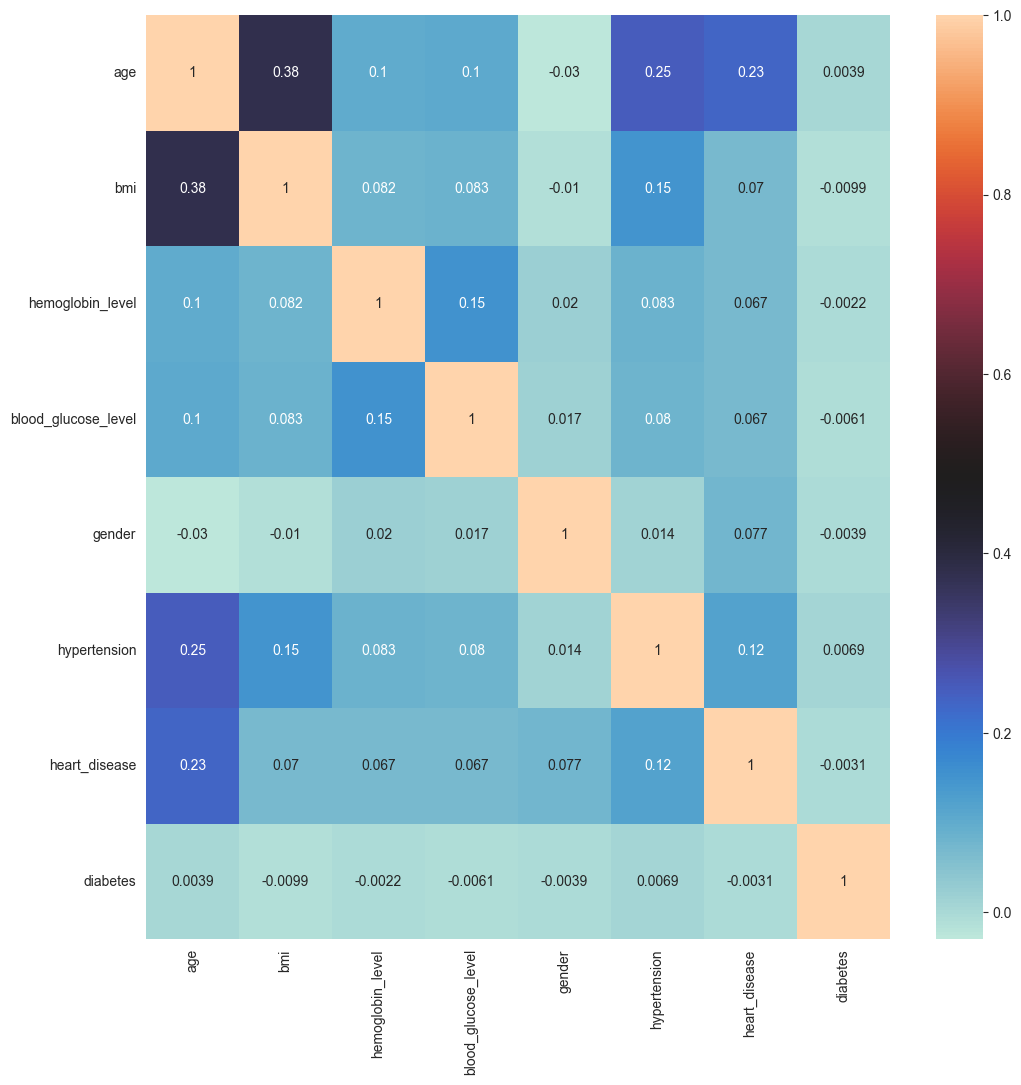

In [45]:
# Menampilkan Grafik Heat Map Korelasi pada Data Numerikal
f, ax = plt.subplots(1,1, figsize=(12,12))
ax = sns.heatmap(Xy_train.corr(), annot = True, cmap = 'icefire')

* Metode Multicollinearity

In [46]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_num_use.columns
    vif["VIF"] = [variance_inflation_factor(X_train_num_use.values, i) for i in range(X_train_num_use.shape[1])]
    
    # urutkan dari nilai tertinggi
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [47]:
calc_vif(X_train_num_use)

,variables,VIF
1,bmi,5.451086
0,age,5.162210
2,hemoglobin_level,3.839769
3,blood_glucose_level,3.046677
4,gender,1.609170
5,hypertension,1.151321
6,heart_disease,1.104408


* Metode Chi Square

In [48]:
X_train_num_use.value_counts()

age     bmi       hemoglobin_level  blood_glucose_level  gender  hypertension  heart_disease
1.0000  0.530828  0.545455          0.471642             0       0             0                10
                  0.090909          0.029851             0       0             0                10
                                    0.477612             0       0             0                 9
                  0.563636          0.447761             0       0             0                 9
                  0.236364          0.477612             0       0             0                 9
                                                                                                ..
0.3875  0.358530  0.545455          0.447761             0       0             0                 1
                  0.563636          0.119403             0       0             0                 1
        0.359375  0.090909          0.447761             0       0             0                 1
                

In [49]:
# Melakukan seleksi fitur dengan chi-square
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_train_num_use, y_train)

df_scores = pd.DataFrame({'Feature': X_train_num_use.columns,
                          'Score': selector.scores_,
                          'p-value': selector.pvalues_.round(4)})

df_scores = df_scores.sort_values(by='Score')

df_scores


,Feature,Score,p-value
4,gender,67.175657,0.0
1,bmi,388.737502,0.0
0,age,814.137843,0.0
2,hemoglobin_level,1318.123440,0.0
3,blood_glucose_level,1831.363260,0.0
6,heart_disease,2376.171353,0.0
5,hypertension,2970.886943,0.0


gunakan chi-square

In [50]:
# menggunakan feature berdasarkan chi square
feat_train = X_train_num_use
feat_test = X_test_num_use

## `vi. Model Definition`

Jenis pemodelan yang akan digunakan pada target dengan tipe data kategorical, diataranya:
- Logistic Regression
- Decision Tree
- Random Forest
- AdaBoost

## `vii. Model Training`

In [51]:
# Melatih data berdasarkan korelasi chi2 square
X_train_pred = feat_train
X_test_pred = feat_test

### Logistic Regression

In [52]:
# Membuat variable untuk model logistic regression
default_logreg = LogisticRegression(random_state=22)
default_logreg.fit(X_train_pred, y_train)

LogisticRegression(random_state=22)

* Prediksi

Evaluation Logistic Regression
Training score: 0.9592
Test score: 0.9586 

Classification Report Test-set Logistic Regression :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18291
           1       0.83      0.65      0.73      1700

    accuracy                           0.96     19991
   macro avg       0.90      0.82      0.85     19991
weighted avg       0.96      0.96      0.96     19991
 

Confusion Matrix: 


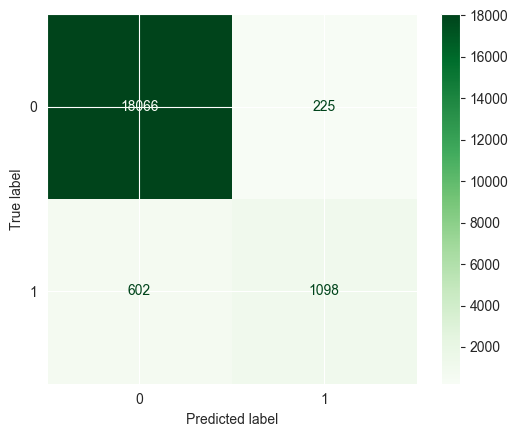

In [53]:
# Melakukan prediksi
y_pred_train_log = default_logreg.predict(X_train_pred)
y_pred_test_log = default_logreg.predict(X_test_pred)

# Menampilkan akurasi prediksi
print("Evaluation Logistic Regression")
print('Training score: {:.4f}'.format(default_logreg.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_logreg.score(X_test_pred, y_test)), '\n')

# Menampilkan classification report untuk data Test
print('Classification Report Test-set Logistic Regression :')
print(classification_report(y_test,y_pred_test_log), '\n')
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(default_logreg, X_test_pred, y_test, cmap='Greens'))

### Menggunakan Decision Tree untuk modeling

In [54]:
default_dt = DecisionTreeClassifier(random_state=22)
default_dt.fit(X_train_pred, y_train)

DecisionTreeClassifier(random_state=22)

* Prediksi

Evaluation Decision Tree
Training score: 0.9974
Test score: 0.9523 

Classification Report Test-set Decision Tree :
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18291
           1       0.71      0.73      0.72      1700

    accuracy                           0.95     19991
   macro avg       0.84      0.85      0.85     19991
weighted avg       0.95      0.95      0.95     19991
 

Confusion Matrix: 


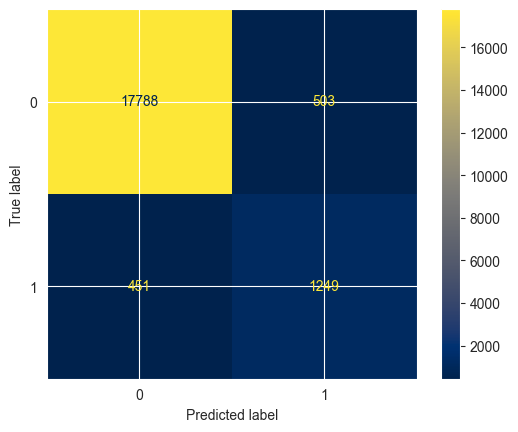

In [55]:
# Melakukan prediksi
y_pred_train_dt = default_dt.predict(X_train_pred)
y_pred_test_dt = default_dt.predict(X_test_pred)

# Menampilkan akurasi prediksi
print("Evaluation Decision Tree")
print('Training score: {:.4f}'.format(default_dt.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_dt.score(X_test_pred, y_test)), '\n')

# Menampilkan classification report untuk data Test
print('Classification Report Test-set Decision Tree :')
print(classification_report(y_test,y_pred_test_dt), '\n')
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(default_dt, X_test_pred, y_test, cmap='cividis'))

### Random Forest

In [56]:
# Menggunakan Random Forest untuk modeling
default_rf = RandomForestClassifier(random_state = 22)
default_rf.fit(X_train_pred, y_train)

RandomForestClassifier(random_state=22)

* Prediksi

Evaluation Random Forest
Training score: 0.9974
Test score: 0.9684 

Classification Report Train-set Random Forest :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18291
           1       0.91      0.70      0.79      1700

    accuracy                           0.97     19991
   macro avg       0.94      0.84      0.89     19991
weighted avg       0.97      0.97      0.97     19991
 

Confusion Matrix: 


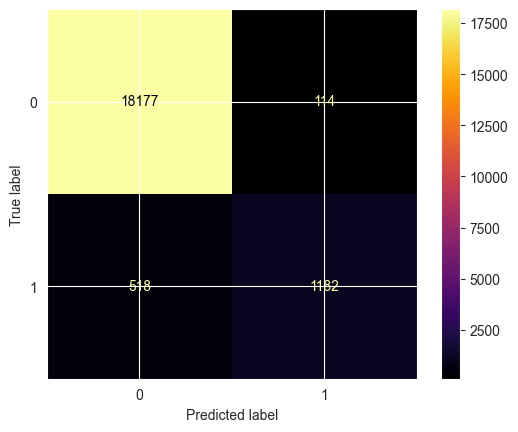

In [57]:
# Melakukan prediksi
y_pred_train_rf = default_rf.predict(X_train_pred)
y_pred_test_rf = default_rf.predict(X_test_pred)

# Menampilkan akurasi prediksi
print("Evaluation Random Forest")
print('Training score: {:.4f}'.format(default_rf.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_rf.score(X_test_pred, y_test)), '\n')

# Menampilkan classification report untuk data Train
print('Classification Report Train-set Random Forest :')
print(classification_report(y_test,y_pred_test_rf), '\n')
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(default_rf, X_test_pred, y_test, cmap='inferno'))

### AdaBoost

In [58]:
# Menggunakan best SVC untuk modeling
default_ab = AdaBoostClassifier(random_state=22)
default_ab.fit(X_train_pred, y_train)

AdaBoostClassifier(random_state=22)

* Prediksi

Evaluation AdaBoost
Training score: 0.9720
Test score: 0.9716 

Classification Report Test-set AdaBoost :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18291
           1       0.97      0.69      0.81      1700

    accuracy                           0.97     19991
   macro avg       0.97      0.84      0.89     19991
weighted avg       0.97      0.97      0.97     19991
 

Confusion Matrix: 


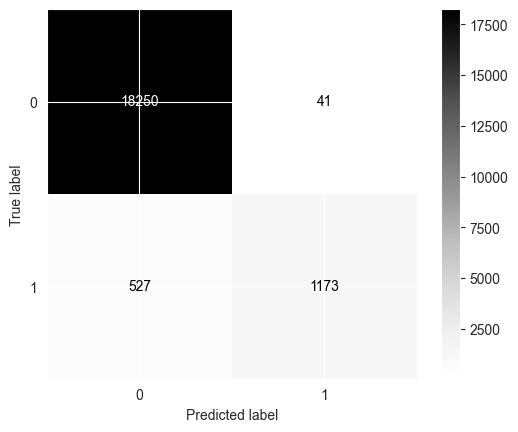

In [59]:
# Melakukan prediksi
y_pred_train_ab = default_ab.predict(X_train_pred)
y_pred_test_ab = default_ab.predict(X_test_pred)

# Menampilkan akurasi prediksi
print("Evaluation AdaBoost")
print('Training score: {:.4f}'.format(default_ab.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_ab.score(X_test_pred, y_test)), '\n')

# Menampilkan classification report untuk data Test
print('Classification Report Test-set AdaBoost :')
print(classification_report(y_test,y_pred_test_ab), '\n')
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(default_ab, X_test_pred, y_test, cmap='Greys'))

## `viii. Model Evaluation `

Berdasarkan hasil yang didapatkan pada proses train-test dataset, saya menggunakan metriks f-score sebagai acuan. Metrics ini digunakan untuk menghindari keadaan false-positif dan false-negatif.

In [60]:
print('Evaluation Logistic Regression : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_log))
print('F1 Score Test :', f1_score(y_test, y_pred_test_log))
print('')
print('Evaluation Decision Tree : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_dt))
print('F1 Score Test :', f1_score(y_test, y_pred_test_dt))
print('')
print('Evaluation Random Forest : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_rf))
print('F1 Score Test :', f1_score(y_test, y_pred_test_rf))
print('')
print('Evaluation AdaBoost : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_ab))
print('F1 Score Test :', f1_score(y_test, y_pred_test_ab))

Evaluation Logistic Regression : 
F1 Score Train :  0.7210197621695612
F1 Score Test : 0.7264306979821369

Evaluation Decision Tree : 
F1 Score Train :  0.9844729770080621
F1 Score Test : 0.7236384704519119

Evaluation Random Forest : 
F1 Score Train :  0.9845099791480488
F1 Score Test : 0.7890520694259012

Evaluation AdaBoost : 
F1 Score Train :  0.8071293266747028
F1 Score Test : 0.8050789293067948


Dari hasil F1 Score diatas, pemodelan menggunakan algoritma Adaboost memberikan hasil tertinggi sehingga algoritma AdaBoost yang akan digunakan.

### `Hyperparameter Tunning`

* Base Model

In [61]:
# Membuat dataframe base model
all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_ab),
    'train - recall' : recall_score(y_train, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_ab),
    'test - recall' : recall_score(y_test, y_pred_test_ab),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_ab),
    'test - f1_score' : f1_score(y_test, y_pred_test_ab),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.971587
test - f1_score,0.805079
test - precision,0.966227
test - recall,0.690000
train - accuracy,0.971986
train - f1_score,0.807129
train - precision,0.973619
train - recall,0.689265


* Random Search

In [62]:
# variable untuk parameter
estimator = [DecisionTreeClassifier()]
n_estimators = [10, 50, 100, 500]
learning_rate = [0.2, 0.4, 0.6, 0.8, 1.0]
random_grid = {'n_estimators': n_estimators,
               'estimator':estimator,
               'learning_rate':learning_rate,
               'algorithm':['SAMME', 'SAMME.R']
               }
random_grid

{'n_estimators': [10, 50, 100, 500],
 'estimator': [DecisionTreeClassifier()],
 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

In [63]:
# Menggunakan randomsearch
ab_randomcv = RandomizedSearchCV(estimator=AdaBoostClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=22, 
                                 n_jobs=-1, 
                                 scoring='f1')
ab_randomcv.fit(X_train_pred, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'estimator': [DecisionTreeClassifier()],
                                        'learning_rate': [0.2, 0.4, 0.6, 0.8,
                                                          1.0],
                                        'n_estimators': [10, 50, 100, 500]},
                   random_state=22, scoring='f1')

In [64]:
print(ab_randomcv.best_estimator_)
print(ab_randomcv.best_params_)
print(ab_randomcv.best_index_)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.8,
                   n_estimators=500)
{'n_estimators': 500, 'learning_rate': 0.8, 'estimator': DecisionTreeClassifier(), 'algorithm': 'SAMME.R'}
35


In [65]:
# Best estimator
ab_randomcv_best = ab_randomcv.best_estimator_

F1 Score - Test Set   :  0.7510102580043518 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18291
           1       0.80      0.71      0.75      1700

    accuracy                           0.96     19991
   macro avg       0.88      0.85      0.86     19991
weighted avg       0.96      0.96      0.96     19991
 

Confusion Matrix      : 


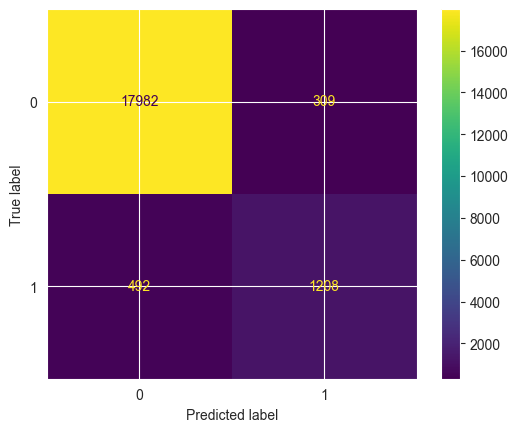

In [66]:
# Classification Report
y_pred_test_abr = ab_randomcv_best.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_abr), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_abr), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_randomcv_best, X_test_pred, y_test))

In [67]:
# Memasukan report Random Search
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_ab),
    'train - recall' : recall_score(y_train, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_abr),
    'test - recall' : recall_score(y_test, y_pred_test_abr),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_abr),
    'test - f1_score' : f1_score(y_test, y_pred_test_abr),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.973619,0.973619
train - recall,0.689265,0.689265
train - accuracy,0.971986,0.971986
train - f1_score,0.807129,0.807129
test - precision,0.966227,0.796309
test - recall,0.690000,0.710588
test - accuracy_score,0.971587,0.959932
test - f1_score,0.805079,0.751010


Insight: 
* Dari hasil setelah dilakukannya hyperparameter tunning, nilai default atau base model untuk metric F1 score pada test justru mengalami penurunan. Nilai baseline test F1 score yang semula 0,805 turun menjadi 0,750. Sehingga nilai baseline F1 sebelum tuning yang memberikan hasil lebih baik.

* Peningkatan metric setelah hyperparameter berada di recall untuk test dari 0,69 menjadi 0,70. Untuk keseluruhan metric di data train tidak mengalami perubahan baik kenaikan maupun penurunan.

## `ix. Model Saving`

In [68]:
# Save File

# Modelling
with open('ab_model.pkl', 'wb') as file_1:
    pickle.dump(default_ab, file_1)

# Pre-processing

with open('scale_feat.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

with open('winsoriser.pkl', 'wb') as file_3:
    pickle.dump(windsoriser, file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'w') as file_4:
    json.dump(num_cols_sc, file_4)

with open('num_cols_nsc.txt', 'w') as file_5:
    json.dump(num_cols_nsc, file_5)

## `x. Model Inference`

### Load Model

In [69]:
# Modelling
with open('ab_model.pkl', 'rb') as file_1:
    ab_model = pickle.load(file_1)


# Pre-processing
with open('scale_feat.pkl', 'rb') as file_2:
    scale_feat = pickle.load(file_2)

with open('winsoriser.pkl', 'rb') as file_3:
    winsoriser = pickle.load(file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'r') as file_4:
    num_cols_sc = json.load(file_4)
    
with open('num_cols_nsc.txt', 'r') as file_5:
    num_cols_nsc = json.load(file_5)

### Inference

In [70]:
# panggil variabel data inference
data_i.head()

,gender,age,hypertension,heart_disease,bmi,hemoglobin_level,blood_glucose_level,diabetes
0,Male,1,0,0,17.28,6.0,126.0,0
1,Male,68,0,0,27.26,4.8,80.0,0
2,Female,22,0,0,25.28,4.8,160.0,0
3,Male,6,0,0,15.18,5.0,160.0,0
4,Male,12,0,0,24.21,3.5,200.0,0


In [71]:
# drop target dari sample
data_i_new = data_i.drop(['diabetes'], axis=1)

### Missing Values

In [72]:
data_i_new.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
hemoglobin_level       0
blood_glucose_level    0
dtype: int64

Karena tidak ada missing values, maka tidak diperlukan handling.

### Encoding

In [73]:
# Mengubah nilai 'Male' menjadi 1 dan 'Female' menjadi 0 pada data_i_new
data_i_new['gender'] = data_i_new['gender'].map({'Male': 1, 'Female': 0})

# Menampilkan hasil perubahan
print(data_i_new)

    gender  age  hypertension  heart_disease    bmi  hemoglobin_level   
0        1    1             0              0  17.28               6.0  \
1        1   68             0              0  27.26               4.8   
2        0   22             0              0  25.28               4.8   
3        1    6             0              0  15.18               5.0   
4        1   12             0              0  24.21               3.5   
5        1   17             0              0  27.32               5.0   
6        0    8             0              0  25.74               6.5   
7        0   17             0              0  27.32               4.8   
8        0   71             0              0  33.02               5.7   
9        1   32             0              0  26.20               5.8   
10       1   22             0              0  19.32               6.5   
11       1   20             0              0  18.38               6.2   
12       0   39             0              0  24.68

### Outliers

In [74]:
data_i_clean = winsoriser.transform(data_i_new)

### Split Data

In [75]:
data_i_sc = data_i_clean[num_cols_sc]
data_i_nsc = data_i_clean[num_cols_nsc]

### Scaling

In [76]:
# transform
data_i_sc = scale_feat.transform(data_i_sc)

In [77]:
# convert ke dataframe
data_i_sc = pd.DataFrame(data_i_sc, columns=num_cols_sc)

# reset index
data_i_sc.reset_index(drop=True, inplace=True)
data_i_nsc.reset_index(drop=True, inplace=True)

In [78]:
# merge data inference scaling dan non-scaling
data_final = pd.concat([data_i_sc, data_i_nsc], axis=1)

In [79]:
data_final.head(3)

,age,bmi,hemoglobin_level,blood_glucose_level,gender,hypertension,heart_disease
0,0.0125,0.106841,0.454545,0.274627,1,0,0
1,0.8500,0.528294,0.236364,0.000000,1,0,0
2,0.2750,0.444679,0.236364,0.477612,0,0,0


### Prediksi Model

In [80]:
y_pred_inf = default_ab.predict(data_final)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## `xi. Kesimpulan`

* `Explorasi Data`

Berdasarkan poin-poin pada explorasi, dapat diketahui:

1. Terdapat ketidakseimbangan data diabetes pada dataset, dengan hanya sekitar 8,5% dari total data merupakan penderita diabetes.

2. Pasien yang menderita diabetes didominasi oleh wanita, dengan selisih jumlah penderita wanita lebih tinggi daripada penderita pria.

3. Mayoritas pasien, baik yang menderita diabetes maupun tidak, memiliki kemungkinan mengidap hipertensi. Namun, tidak semua pasien diabetes atau pasien non-diabetes menderita hipertensi. Mayoritas pasien yang menderita hipertensi adalah wanita.

4. Sama seperti hipertensi, hanya sebagian kecil pasien diabetes yang menderita penyakit jantung. Mayoritas pasien dengan penyakit jantung juga adalah wanita.

5. Informasi tentang riwayat merokok tidak nampak relevan dalam memprediksi apakah pasien akan menderita diabetes atau tidak, karena banyaknya kategori "No_info" dalam dataset.

6. Heatmap menunjukkan adanya korelasi antara kemungkinan diabetes dengan beberapa variabel seperti "bmi", "hemoglobin_level", "blood_glucose_level", dan lain-lain.

Kesimpulannya, terdapat ketidakseimbangan data diabetes dalam dataset, dan beberapa variabel seperti "bmi", "hemoglobin_level", dan "blood_glucose_level" memiliki korelasi dengan kemungkinan diabetes. Selain itu, terdapat perbedaan gender dalam distribusi pasien diabetes dan beberapa komorbiditas seperti hipertensi dan penyakit jantung.

* `Pemodelan`

Berdasarkan hasil pengujian menggunakan 4 algoritma pemodelan yaitu Logistic Regression, Decision Tree, Random Forest, dan AdaBoost didapatkan hasil bahwa model dengan AdaBoost memiliki nilai F1 Score yang lebih baik dibandingkan ketiga algoritma lainnya. Alasan penggunaan metric F1 score adalah untuk mengurangi nilai false positive dan false negatif dari prediksi. 

Dari hasil setelah dilakukannya hyperparameter tunning, nilai default atau base model untuk metric F1 score pada test justru mengalami penurunan. Nilai baseline test F1 score yang semula 0,805 turun menjadi 0,750. Sehingga nilai baseline F1 sebelum tuning yang memberikan hasil lebih baik. Peningkatan metric setelah hyperparameter berada di recall untuk test dari 0,69 menjadi 0,70. Untuk keseluruhan metric di data train tidak mengalami perubahan baik kenaikan maupun penurunan.